In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['ambilobe',
 'lucea',
 'saint-pierre',
 'atuona',
 'codrington',
 'severo-kurilsk',
 'leningradskiy',
 'pulawy',
 'keti bandar',
 'georgetown',
 'albany',
 'hobart',
 'barrow',
 'port lincoln',
 'khatanga',
 'ostrovnoy',
 'geraldton',
 'twin falls',
 'tuktoyaktuk',
 'goderich',
 'torbay',
 'mettur',
 'nsanje',
 'general pico',
 'rudnya',
 'bengkulu',
 'tatarani',
 'cape town',
 'halalo',
 'saint-philippe',
 'andenes',
 'busselton',
 'gutierrez zamora',
 'puerto ayora',
 'george town',
 'cantagallo',
 'mount isa',
 'zeya',
 'sur',
 'lebu',
 'comodoro rivadavia',
 'kant',
 'belushya guba',
 'bethel',
 'tasiilaq',
 'arcoverde',
 'bredasdorp',
 'padang',
 'kahului',
 'qaanaaq',
 'punta arenas',
 'mataura',
 'yellowknife',
 'korla',
 'plettenberg bay',
 'chuy',
 'castro',
 'warqla',
 'kyabe',
 'atar',
 'mikun',
 'ushuaia',
 'kiruna',
 'luorong',
 'hermanus',
 'rikitea',
 'bathsheba',
 'merauke',
 'caconda',
 'nizhneyansk',
 'havelock',
 'merrill',
 'tuatapere',
 'iberia',
 'karratha',
 'kr

In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
tempunits = "imperial"

# Build query URL
query_url = f"{url}&appid={api_key}&units={tempunits}&q=" 
print(query_url)

http://api.openweathermap.org/data/2.5/weather?&appid=9fd8e30dbf72cfdf67dcc22f6823583a&units=imperial&q=


In [5]:
# Get weather data
weather_response = requests.get(query_url)
weather_json = weather_response.json()


In [6]:
#city loop
City =[]
Lat=[]
Lng=[]         
Max_Temp=[]     
Humidity=[]   
Cloudiness=[] 
Wind_Speed=[]  
Country=[]  
Date=[]   
city_counter = 1


for city in cities:
    try: #tries to match cities in list

        response = requests.get(query_url+city).json()
        City.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Lng.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
        city_selected = response["name"]
        
        print(f"Processing Record {city_counter} | {city_selected}")

        city_counter = city_counter +1
    except: #if city not found 
        print("City not found. Skipping...")
    continue

print(f"Data Completed")

Processing Record 1 | Ambilobe
Processing Record 2 | Lucea
Processing Record 3 | Saint-Pierre
Processing Record 4 | Atuona
Processing Record 5 | Codrington
Processing Record 6 | Severo-Kuril'sk
Processing Record 7 | Leningradskiy
Processing Record 8 | Puławy
Processing Record 9 | Keti Bandar
Processing Record 10 | George Town
Processing Record 11 | Albany
Processing Record 12 | Hobart
Processing Record 13 | Barrow
Processing Record 14 | Port Lincoln
Processing Record 15 | Khatanga
Processing Record 16 | Ostrovnoy
Processing Record 17 | Geraldton
Processing Record 18 | Twin Falls
Processing Record 19 | Tuktoyaktuk
Processing Record 20 | Goderich
Processing Record 21 | Torbay
Processing Record 22 | Mettur
Processing Record 23 | Nsanje
Processing Record 24 | General Pico
Processing Record 25 | Rudnya
Processing Record 26 | Bengkulu
Processing Record 27 | Tătărani
Processing Record 28 | Cape Town
City not found. Skipping...
Processing Record 29 | Saint-Philippe
Processing Record 30 | Anden

City not found. Skipping...
Processing Record 234 | Zyukayka
Processing Record 235 | Birao
Processing Record 236 | Arkul'
Processing Record 237 | Chapais
Processing Record 238 | Pitkyaranta
Processing Record 239 | Constitución
Processing Record 240 | Nioro
Processing Record 241 | Gwanda
Processing Record 242 | Nikolskoye
Processing Record 243 | Skellefteå
Processing Record 244 | Severo-Yeniseyskiy
Processing Record 245 | Vardø
Processing Record 246 | Inhambane
Processing Record 247 | Dalby
City not found. Skipping...
Processing Record 248 | Mar del Plata
Processing Record 249 | Deputatsky
Processing Record 250 | Lázaro Cárdenas
Processing Record 251 | Bariloche
Processing Record 252 | Saskylakh
Processing Record 253 | Marsh Harbour
Processing Record 254 | Saint-Joseph
Processing Record 255 | Havre-St-Pierre
Processing Record 256 | Yurimaguas
Processing Record 257 | Eyl
Processing Record 258 | Banda Aceh
Processing Record 259 | Coquimbo
Processing Record 260 | Bubaque
Processing Record 

Processing Record 457 | Seminole
Processing Record 458 | Xingcheng
City not found. Skipping...
Processing Record 459 | Shitanjing
City not found. Skipping...
Processing Record 460 | Turukhansk
Processing Record 461 | Erzin
Processing Record 462 | Kununurra
Processing Record 463 | Andros Town
City not found. Skipping...
City not found. Skipping...
Processing Record 464 | Khovd
Processing Record 465 | Bogorodskoye
Processing Record 466 | Pisco
Processing Record 467 | Soledade
Processing Record 468 | Lincoln
Processing Record 469 | Yar-Sale
Processing Record 470 | Marstal
Processing Record 471 | Kaduqli
Processing Record 472 | Verāval
Processing Record 473 | Mahon
Processing Record 474 | Gondanglegi
Processing Record 475 | Te Anau
Processing Record 476 | Luang Prabang
Processing Record 477 | Katsuura
Processing Record 478 | Laredo
Processing Record 479 | Juneau
Processing Record 480 | Krasnosel'kup
Processing Record 481 | Virginia Beach
Processing Record 482 | St. George's
Processing Reco

In [7]:
#creating dataframe for weather/cities
weather_dict = {"City Name": City, "Latitude" : Lat, "Longitude" : Lng, "Max Temp":Max_Temp, "Humidity":Humidity, "Cloudiness": Cloudiness,
             "Wind Speed":Wind_Speed, "Country":Country,"Date": Date }

weather_df = pd.DataFrame(weather_dict)  
weather_df.count()

City Name     547
Latitude      547
Longitude     547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [8]:
#checking max humidity
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,5.470000e+02
mean,19.836856,18.700622,68.953656,70.904936,46.376600,7.717112,1.592872e+09
std,32.831338,92.016939,14.143471,20.752821,36.779175,5.097580,7.298327e+01
min,-54.800000,-175.200000,31.660000,1.000000,0.000000,0.380000,1.592872e+09
25%,-6.060000,-66.305000,58.785000,61.000000,6.500000,3.560000,1.592872e+09
50%,22.630000,23.680000,70.990000,76.000000,40.000000,6.600000,1.592872e+09
75%,45.425000,100.425000,80.375000,86.000000,81.500000,10.870000,1.592872e+09
max,78.220000,179.320000,104.340000,100.000000,100.000000,25.590000,1.592872e+09


In [11]:
#cleaning dataframe for humidity >100
weather_humidity = weather_df[(weather_df["Humidity"]>100)].index
cleaned_weather_df = weather_df.drop(weather_humidity, inplace=False)
#no city with humidity over 100
humidity100 = weather_df.loc[weather_df["Humidity"]>100]
humidity100

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


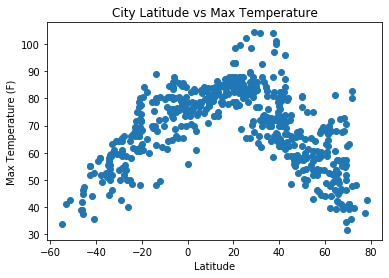

In [22]:
#temp vs latitude
x_val_temp = cleaned_weather_df["Latitude"]
y_val_temp = cleaned_weather_df["Max Temp"]

plt.scatter(x_val_temp, y_val_temp)
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save figure
plt.savefig("LatitudevsMaxTemp.png")
plt.show()
#as latitude increases from southern to northern hemisphere, there is a gradual increase in temp. 
#When latitude hits 0, this is the equator and holds the hottest temperatures

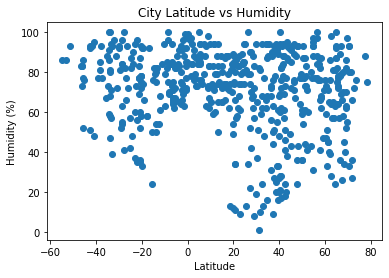

In [23]:
#humidity vs latitude
x_val_hum = cleaned_weather_df["Latitude"]
y_val_hum = cleaned_weather_df["Humidity"]

plt.scatter(x_val_hum, y_val_hum)
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#save figure
plt.savefig("LatitudevsHumidity.png")
plt.show()

#humidity does not have a direct correlation to latitude. 
#Lowest humidity point in the southern hemisphere is around 20%

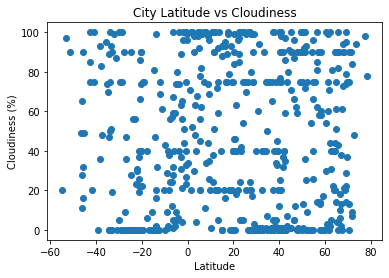

In [36]:
#latitude vs cloudiness
x_val_clo = cleaned_weather_df["Latitude"]
y_val_clo = cleaned_weather_df["Cloudiness"]

plt.scatter(x_val_clo, y_val_clo)
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save figure
plt.savefig("LatitudevsCloudiness.png")
plt.show()
#cloudiness does not have a direct correlation to latitude. 

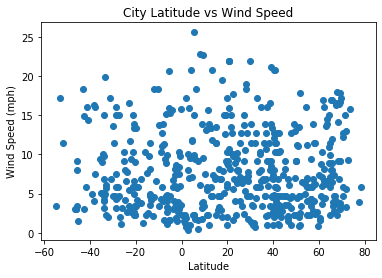

In [25]:
#latitude vs wind speed
x_val_wind = cleaned_weather_df["Latitude"]
y_val_wind = cleaned_weather_df["Wind Speed"]

plt.scatter(x_val_wind, y_val_wind)
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save figure
plt.savefig("LatitudevsWindspeed.png")
plt.show()
#wind speed does not have a direct correlation to latitude. 
#equator proximity holds the highest wind speed (~25mph)

In [29]:
#dataframes for northern and southern hemispheres
northern_df = cleaned_weather_df[cleaned_weather_df["Latitude"]>0]
southern_df = cleaned_weather_df[cleaned_weather_df["Latitude"]<0]
northern_df.head()

,City Name,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Lucea,18.45,-78.17,86.00,74,20,14.99,JM,1592872024
5,Severo-Kuril'sk,50.68,156.12,50.52,77,92,11.14,RU,1592871916
6,Leningradskiy,69.38,178.42,34.72,86,100,16.67,RU,1592872024
7,Puławy,51.42,21.97,64.99,44,100,13.51,PL,1592872024
8,Keti Bandar,24.14,67.45,85.14,80,5,9.37,PK,1592872024


<function matplotlib.pyplot.show(*args, **kw)>

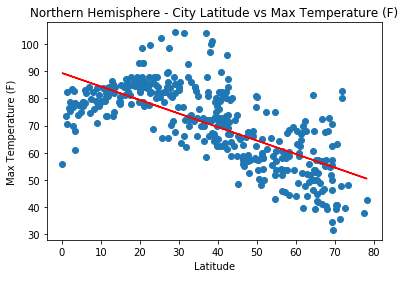

In [31]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
lat_maxtemp_df = northern_df [["Latitude","Max Temp"]]
xval_latmax = lat_maxtemp_df ["Latitude"]
yval_latmax = lat_maxtemp_df ["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_latmax, yval_latmax)
regression_value = xval_latmax * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_latmax, yval_latmax)
plt.plot(xval_latmax, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Northern Hemisphere - City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

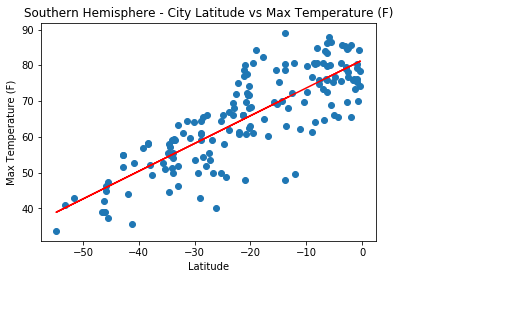

In [34]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
lat_maxtemp_df = southern_df [["Latitude","Max Temp"]]
xval_latmax = lat_maxtemp_df ["Latitude"]
yval_latmax = lat_maxtemp_df ["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_latmax, yval_latmax)
regression_value = xval_latmax * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_latmax, yval_latmax)
plt.plot(xval_latmax, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Southern Hemisphere - City Latitude vs Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show

For above pair of plots, northern hemisphere has a negative correlation while southern hemisphere has a positive correlation.

<function matplotlib.pyplot.show(*args, **kw)>

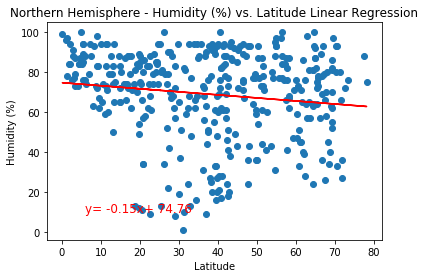

In [33]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
lat_humid_df = northern_df [["Latitude","Humidity"]]
xval_humid = lat_humid_df ["Latitude"]
yval_humid = lat_humid_df ["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_humid, yval_humid)
regression_value = xval_humid * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_humid, yval_humid)
plt.plot(xval_humid, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

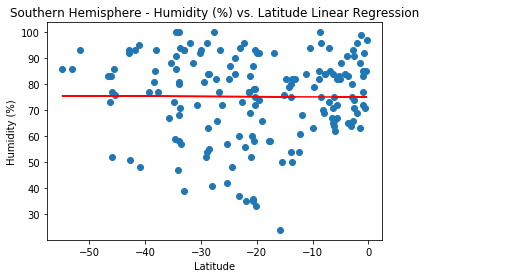

In [35]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
lat_humid_df = southern_df [["Latitude","Humidity"]]
xval_humid = lat_humid_df ["Latitude"]
yval_humid = lat_humid_df ["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_humid, yval_humid)
regression_value = xval_humid * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_humid, yval_humid)
plt.plot(xval_humid, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show

For above pair of plots, northern hemisphere and southern hemisphere have almost no correlation.

<function matplotlib.pyplot.show(*args, **kw)>

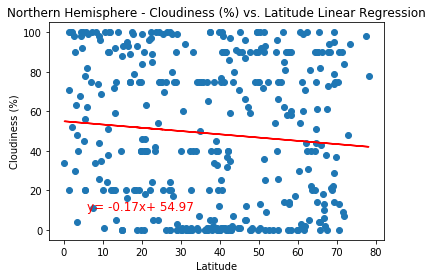

In [37]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
lat_cloud_df = northern_df [["Latitude","Cloudiness"]]
xval_cloud = lat_cloud_df ["Latitude"]
yval_cloud = lat_cloud_df ["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_cloud, yval_cloud)
regression_value = xval_cloud * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_cloud, yval_cloud)
plt.plot(xval_cloud, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

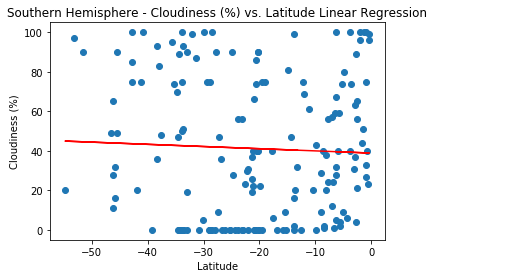

In [39]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
lat_cloud_df = southern_df [["Latitude","Cloudiness"]]
xval_cloud = lat_cloud_df ["Latitude"]
yval_cloud = lat_cloud_df ["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_cloud, yval_cloud)
regression_value = xval_cloud * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_cloud, yval_cloud)
plt.plot(xval_cloud, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show

For above pair of plots, northern hemisphere and southern hemisphere have almost no correlation.

<function matplotlib.pyplot.show(*args, **kw)>

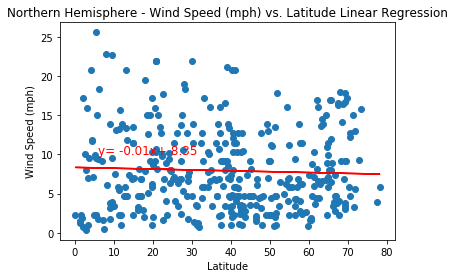

In [40]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
lat_wind_df = northern_df [["Latitude","Wind Speed"]]
xval_wind = lat_wind_df ["Latitude"]
yval_wind = lat_wind_df ["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_wind, yval_wind)
regression_value = xval_wind * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_wind, yval_wind)
plt.plot(xval_wind, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

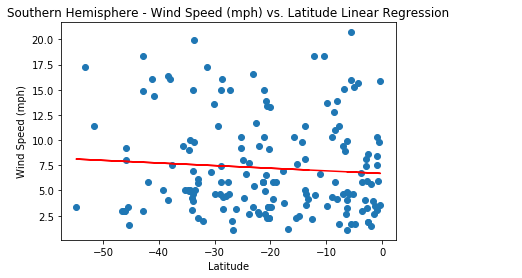

In [41]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
lat_wind_df = southern_df [["Latitude","Wind Speed"]]
xval_wind = lat_wind_df ["Latitude"]
yval_wind = lat_wind_df ["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress (xval_wind, yval_wind)
regression_value = xval_wind * slope + intercept
line_equation = "y= " + str(round(slope,2)) + "x+ " + str(round(intercept,2))
plt.scatter(xval_wind, yval_wind)
plt.plot(xval_wind, regression_value, "r-")
plt.annotate(line_equation,(6,10), fontsize=12, color = "red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show

For above pair of plots, northern hemisphere and southern hemisphere have almost no correlation.

Observations:
-As latitude increases from southern to northern hemisphere, there is a gradual increase in temperature. When latitude hits 0, this is the equator and holds the hottest temperatures.
-Humidity does not have a direct correlation to latitude. The lowest humidity point in the southern hemisphere is around 20%
-Cloudiness does not have a direct correlation to latitude. 
-Wind speed does not have a direct correlation to latitude. Equator proximity (around 0 value on x-axis) holds the highest wind speed (~25mph)